In [1]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the data (important for KMeans to work effectively)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Number of clusters = 3 (as we know there are 3 classes of wines)
kmeans.fit(X_scaled)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [4]:
# Visualizing the clustering result on the first two principal components using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


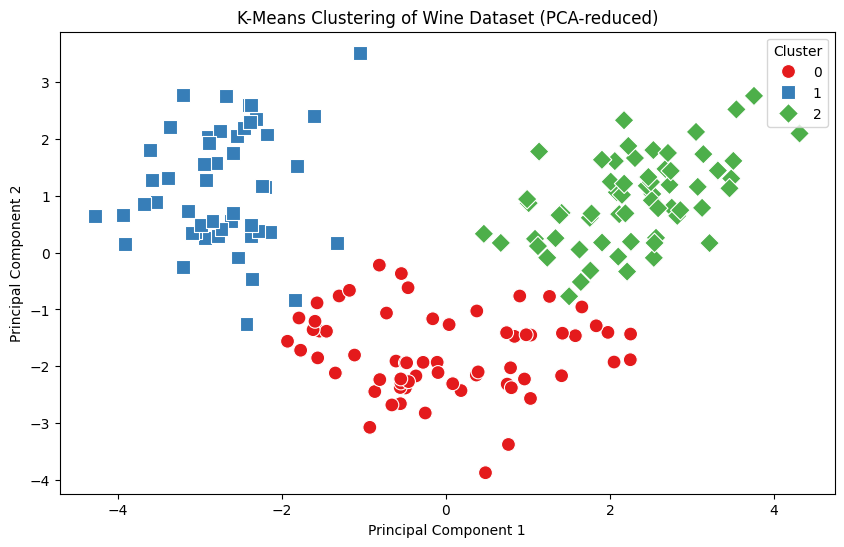

In [5]:
# Plotting the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', style=labels, s=100, markers=["o", "s", "D"])
plt.title("K-Means Clustering of Wine Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [6]:
# Output the cluster centers
print("Cluster Centers (after PCA):\n", cluster_centers)


Cluster Centers (after PCA):
 [[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


In [7]:
# Evaluate the clustering by comparing with the actual labels (for illustration purposes)
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:\n", confusion_matrix(y, labels))
print("\nClassification Report:\n", classification_report(y, labels))



Confusion Matrix:
 [[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.06      0.04      0.05        71
           2       0.00      0.00      0.00        48

    accuracy                           0.02       178
   macro avg       0.02      0.01      0.02       178
weighted avg       0.02      0.02      0.02       178

